In [2]:
%load_ext tikzmagic

---
slug: "/blog/denselayers"
date: "2021-03-18"
title: "Dense Layers"
category: "Machine Learning"
order: 7
---

### Logistic Regression Binary Classifier Computation Graph

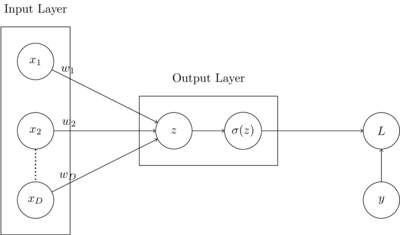

In [7]:
%%tikz s=600,300  -sc=2
\node[draw, circle, minimum width=3em] (x1) at (0, 2) {$x_1$};
\node[draw, circle, minimum width=3em] (x2) at (0, 1) {$x_2$};
\node[draw, circle, minimum width=3em] (xd) at (0, 0) {$x_D$};
\node[draw, circle, minimum width=3em] (z) at (2, 1) {$z$};
\node[draw, circle, minimum width=3em] (sz) at (3, 1) {$\sigma(z)$};
\node[draw, circle, minimum width=3em] (l) at (5, 1) {$L$};
\node[draw, circle, minimum width=3em] (y) at (5, 0) {$y$};
\node (il) at (0, 2.75) {Input Layer};
\node (ol) at (2.5, 1.75) {Output Layer};
\draw (-0.5, 2.5) rectangle (0.5, -0.5);
\draw (1.5, 1.5) rectangle (3.5, 0.5);
\draw[dotted, line width=1pt] (x2) -- (xd);
\draw[->] (x1) edge node[pos=0.15, above] {$w_1$} (z);
\draw[->] (x2) edge node[pos=0.15, above] {$w_2$} (z);
\draw[->] (xd) edge node[pos=0.15, above] {$w_D$} (z);
\draw[->] (z) -- (sz);
\draw[->] (sz) -- (l);
\draw[->] (y) -- (l);

$$
\begin{aligned}
    \frac{\partial L}{\partial w_i} &= 
    \frac{\partial z}{\partial w_i}
    \frac{\partial \sigma(z)}{\partial z}
    \frac{\partial L}{\partial \sigma(z)}\\
\end{aligned}
$$

### 2 Layer Neural Network Binary Classifier Computation Graph

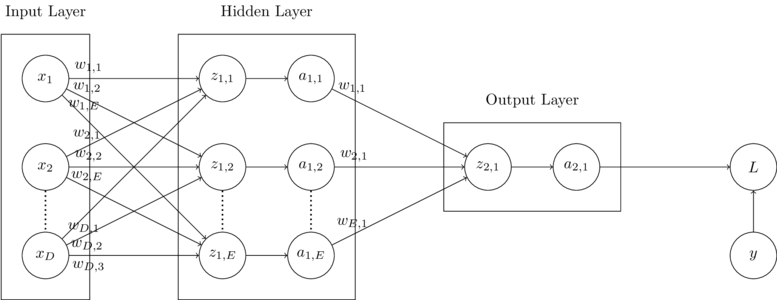

In [140]:
%%tikz -s=900,300 -sc=2
\node[draw, circle, minimum width=3em] (x1) at (0, 2) {$x_1$};
\node[draw, circle, minimum width=3em] (x2) at (0, 1) {$x_2$};
\node[draw, circle, minimum width=3em] (xd) at (0, 0) {$x_D$};
\node[draw, circle, minimum width=3em] (z11) at (2, 2) {$z_{1, 1}$};
\node[draw, circle, minimum width=3em] (z12) at (2, 1) {$z_{1, 2}$};
\node[draw, circle, minimum width=3em] (z1e) at (2, 0) {$z_{1, E}$};
\node[draw, circle, minimum width=3em] (a11) at (3, 2) {$a_{1, 1}$};
\node[draw, circle, minimum width=3em] (a12) at (3, 1) {$a_{1, 2}$};
\node[draw, circle, minimum width=3em] (a1e) at (3, 0) {$a_{1, E}$};
\node[draw, circle, minimum width=3em] (z21) at (5, 1) {$z_{2, 1}$};
\node[draw, circle, minimum width=3em] (a21) at (6, 1) {$a_{2, 1}$};
\node[draw, circle, minimum width=3em] (l) at (8, 1) {$L$};
\node[draw, circle, minimum width=3em] (y) at (8, 0) {$y$};
\node (il) at (0, 2.75) {Input Layer};
\node (hl) at (2.5, 2.75) {Hidden Layer};
\node (ol) at (5.5, 1.75) {Output Layer};
\draw(-.5, 2.5) rectangle (.5, -.5);
\draw (1.5, 2.5) rectangle (3.5, -0.5);
\draw (4.5, 1.5) rectangle (6.5, 0.5);
\draw[dotted, line width=1pt] (x2) -- (xd);
\draw[dotted, line width=1pt] (z12) -- (z1e);
\draw[dotted, line width=1pt] (a12) -- (a1e);
\draw[->] (x1) edge node[pos=0.15, above] {$w_{1, 1}$} (z11);
\draw[->] (x1) edge node[pos=0.15, above] {$w_{1, 2}$} (z12);
\draw[->] (x1) edge node[pos=0.15, above] {$w_{1, E}$} (z1e);
\draw[->] (x2) edge node[pos=0.15, above] {$w_{2, 1}$} (z11);
\draw[->] (x2) edge node[pos=0.15, above] {$w_{2, 2}$} (z12);
\draw[->] (x2) edge node[pos=0.15, above] {$w_{2, E}$} (z1e);
\draw[->] (xd) edge node[pos=0.15, below] {$w_{D, 1}$} (z11);
\draw[->] (xd) edge node[pos=0.15, below] {$w_{D, 2}$} (z12);
\draw[->] (xd) edge node[pos=0.15, below] {$w_{D, 3}$} (z1e);
\draw[->] (z11) -- (a11);
\draw[->] (z12) -- (a12);
\draw[->] (z1e) -- (a1e);
\draw[->] (a11) edge node[pos=0.15, above] {$w_{1, 1}$} (z21);
\draw[->] (a12) edge node[pos=0.15, above] {$w_{2, 1}$} (z21);
\draw[->] (a1e) edge node[pos=0.15, above] {$w_{E, 1}$} (z21);
\draw[->] (z21) -- (a21);
\draw[->] (a21) -- (l);
\draw[->] (y) -- (l);

$$
\begin{aligned}
    \frac{\partial L}{\partial w_{2,i}} &= 
    \frac{\partial z_2}{\partial w_{2, i}}
    \frac{\partial a_2}{\partial z_2}
    \frac{\partial L}{\partial a_2} &
    \text{[Output Layer weight gradient]}\\
    \frac{\partial L}{\partial w_{1,i}} &=
    \frac{\partial z_1}{\partial w_{1,i}} 
    \frac{\partial a_1}{\partial z_1}
    \frac{\partial z_2}{\partial a_1}
    \frac{\partial a_2}{\partial z_2} 
    \frac{\partial L}{\partial a_2} &
    \text{[Hidden Layer weight gradient]}\\
    \\
\end{aligned}
$$

### Softmax Regression Computation Graph

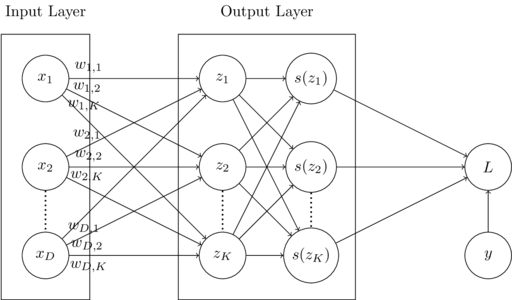

In [155]:
%%tikz -s=600,300 -sc=2
\node[draw, circle, minimum width=3em] (x1) at (0, 2) {$x_1$};
\node[draw, circle, minimum width=3em] (x2) at (0, 1) {$x_2$};
\node[draw, circle, minimum width=3em] (xd) at (0, 0) {$x_D$};
\node[draw, circle, minimum width=3em] (z1) at (2, 2) {$z_1$};
\node[draw, circle, minimum width=3em] (z2) at (2, 1) {$z_2$};
\node[draw, circle, minimum width=3em] (zk) at (2, 0) {$z_K$};
\node[draw, circle, minimum width=3em] (sz1) at (3, 2) {$s(z_1)$};
\node[draw, circle, minimum width=3em] (sz2) at (3, 1) {$s(z_2)$};
\node[draw, circle, minimum width=3em] (szk) at (3, 0) {$s(z_K)$};
\node[draw, circle, minimum width=3em] (l) at (5, 1) {$L$};
\node[draw, circle, minimum width=3em] (y) at (5, 0) {$y$};
\node (il) at (0, 2.75) {Input Layer};
\node (ol) at (2.5, 2.75) {Output Layer};
\draw (-0.5, 2.5) rectangle (0.5, -0.5);
\draw (1.5, 2.5) rectangle (3.5, -0.5);
\draw[dotted, line width=1pt] (x2) -- (xd);
\draw[dotted, line width=1pt] (z2) -- (zk);
\draw[dotted, line width=1pt] (sz2) -- (szk);
\draw[->] (x1) edge node[pos=0.15, above] {$w_{1,1}$} (z1);
\draw[->] (x1) edge node[pos=0.15, above] {$w_{1,2}$} (z2);
\draw[->] (x1) edge node[pos=0.15, above] {$w_{1,K}$} (zk);
\draw[->] (x2) edge node[pos=0.15, above] {$w_{2,1}$} (z1);
\draw[->] (x2) edge node[pos=0.15, above] {$w_{2,2}$} (z2);
\draw[->] (x2) edge node[pos=0.15, above] {$w_{2,K}$} (zk);
\draw[->] (xd) edge node[pos=0.15, below] {$w_{D,1}$} (z1);
\draw[->] (xd) edge node[pos=0.15, below] {$w_{D,2}$} (z2);
\draw[->] (xd) edge node[pos=0.15, below] {$w_{D,K}$} (zk);
\draw[->] (z1) -- (sz1);
\draw[->] (z1) -- (sz2);
\draw[->] (z1) -- (szk);
\draw[->] (z2) -- (sz1);
\draw[->] (z2) -- (sz2);
\draw[->] (z2) -- (szk);
\draw[->] (zk) -- (sz1);
\draw[->] (zk) -- (sz2);
\draw[->] (zk) -- (szk);
\draw[->] (sz1) -- (l);
\draw[->] (sz2) -- (l);
\draw[->] (szk) -- (l);
\draw[->] (y) -- (l);

### 2 Layer Neural Network Softmax Classifier Computation Graph

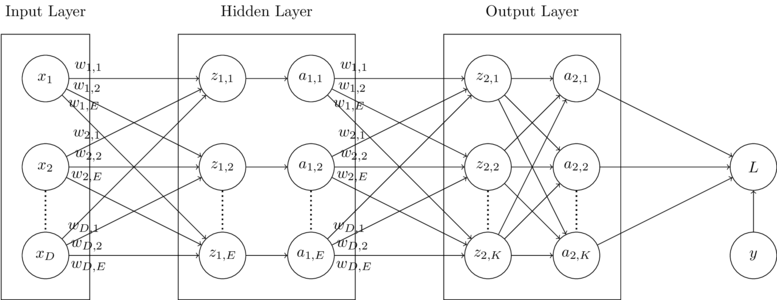

In [192]:
%%tikz -s=900,300 -sc=2
\node[draw, circle, minimum width=3em] (x1) at (0, 2) {$x_1$};
\node[draw, circle, minimum width=3em] (x2) at (0, 1) {$x_2$};
\node[draw, circle, minimum width=3em] (xd) at (0, 0) {$x_D$};
\node[draw, circle, minimum width=3em] (z11) at (2, 2) {$z_{1, 1}$};
\node[draw, circle, minimum width=3em] (z12) at (2, 1) {$z_{1, 2}$};
\node[draw, circle, minimum width=3em] (z1e) at (2, 0) {$z_{1, E}$};
\node[draw, circle, minimum width=3em] (a11) at (3, 2) {$a_{1, 1}$};
\node[draw, circle, minimum width=3em] (a12) at (3, 1) {$a_{1, 2}$};
\node[draw, circle, minimum width=3em] (a1e) at (3, 0) {$a_{1, E}$};
\node[draw, circle, minimum width=3em] (z21) at (5, 2) {$z_{2, 1}$};
\node[draw, circle, minimum width=3em] (z22) at (5, 1) {$z_{2, 2}$};
\node[draw, circle, minimum width=3em] (z2k) at (5, 0) {$z_{2, K}$};
\node[draw, circle, minimum width=3em] (a21) at (6, 2) {$a_{2, 1}$};
\node[draw, circle, minimum width=3em] (a22) at (6, 1) {$a_{2, 2}$};
\node[draw, circle, minimum width=3em] (a2k) at (6, 0) {$a_{2, K}$};
\node[draw, circle, minimum width=3em] (l) at (8, 1) {$L$};
\node[draw, circle, minimum width=3em] (y) at (8, 0) {$y$};
\node (il) at (0, 2.75) {Input Layer};
\node (hl) at (2.5, 2.75) {Hidden Layer};
\node (ol) at (5.5, 2.75) {Output Layer};
\draw (-0.5, 2.5) rectangle (0.5, -0.5);
\draw(1.5, 2.5) rectangle (3.5, -0.5);
\draw(4.5, 2.5) rectangle (6.5, -0.5);
\draw[dotted, line width=1pt] (x2) -- (xd);
\draw[dotted, line width=1pt] (z12) -- (z1e);
\draw[dotted, line width=1pt] (a12) -- (a1e);
\draw[dotted, line width=1pt] (z22) -- (z2k);
\draw[dotted, line width=1pt] (a22) -- (a2k);
\draw[->] (x1) edge node[pos=0.15, above] {$w_{1,1}$} (z11);
\draw[->] (x1) edge node[pos=0.15, above] {$w_{1,2}$} (z12);
\draw[->] (x1) edge node[pos=0.15, above] {$w_{1,E}$} (z1e);
\draw[->] (x2) edge node[pos=0.15, above] {$w_{2,1}$} (z11);
\draw[->] (x2) edge node[pos=0.15, above] {$w_{2,2}$} (z12);
\draw[->] (x2) edge node[pos=0.15, above] {$w_{2,E}$} (z1e);
\draw[->] (xd) edge node[pos=0.15, below] {$w_{D,1}$} (z11);
\draw[->] (xd) edge node[pos=0.15, below] {$w_{D,2}$} (z12);
\draw[->] (xd) edge node[pos=0.15, below] {$w_{D,E}$} (z1e);
\draw[->] (z11) -- (a11);
\draw[->] (z12) -- (a12);
\draw[->] (z1e) -- (a1e);
\draw[->] (a11) edge node[pos=0.15, above] {$w_{1,1}$} (z21);
\draw[->] (a11) edge node[pos=0.15, above] {$w_{1,2}$} (z22);
\draw[->] (a11) edge node[pos=0.15, above] {$w_{1,E}$} (z2k);
\draw[->] (a12) edge node[pos=0.15, above] {$w_{2,1}$} (z21);
\draw[->] (a12) edge node[pos=0.15, above] {$w_{2,2}$} (z22);
\draw[->] (a12) edge node[pos=0.15, above] {$w_{2,E}$} (z2k);
\draw[->] (a1e) edge node[pos=0.15, below] {$w_{D,1}$} (z21);
\draw[->] (a1e) edge node[pos=0.15, below] {$w_{D,2}$} (z22);
\draw[->] (a1e) edge node[pos=0.15, below] {$w_{D,E}$} (z2k);
\draw[->] (z21) -- (a21);
\draw[->] (z21) -- (a22);
\draw[->] (z21) -- (a2k);
\draw[->] (z22) -- (a21);
\draw[->] (z22) -- (a22);
\draw[->] (z22) -- (a2k);
\draw[->] (z2k) -- (a21);
\draw[->] (z2k) -- (a22);
\draw[->] (z2k) -- (a2k);
\draw[->] (a21) -- (l);
\draw[->] (a22) -- (l);
\draw[->] (a2k) -- (l);
\draw[->] (y) -- (l);

### Resources

- Burkov, Andriy. *The Hundred Page Machine Learning Book*. 2019.
- Jurafsky, Daniel, and James H. Martin. *Speech and Language Processing: An Introduction to Natural Language Processing, Computational Linguistics, and Speech Recognition*. Pearson, 2020.
- Goodfellow, Ian, et al. *Deep Learning*. MIT Press, 2017. 